In [1]:
import json 
import os
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
from matplotlib.path import Path


import numpy as np
plt.rcParams["figure.figsize"] = (15,8)
from skimage.io import imread, imshow, imsave
from skimage.color import rgb2gray
from skimage.draw import polygon
from skimage import draw
from sklearn.metrics import confusion_matrix
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


data_dir = "/home/kti01/Documents/My Files/Projects/Overlap/data/pilot/pilot6"
annotations = []
for file in os.listdir(data_dir):
    if file.endswith('json'):
        with open(os.path.join(data_dir, file)) as f:
            d = json.load(f)
            annotations.append(dict(d))

In [2]:
annotations = annotations[0]

In [3]:
poly1 = np.array(annotations['Nävus (exzidieren)'][0]['data']['points'])
poly1[:, 0] *= 600
poly1[:, 1] *= 450
poly1 = poly1.astype(int)
poly1

exp1 = str(annotations['Nävus (exzidieren)'][0]['children']['Erklärung']['data']['selected'][0])
exp1

conf1 = int(annotations['Nävus (exzidieren)'][0]['children']['Konfidenz in die Entscheidung']['data']['selected'][0])
conf1

diag1 = annotations['Melanom'], annotations['Nävus (belassen) '], annotations['Nävus (exzidieren)']
if len(diag1[0]) != 0:
    diag1 = 'Melanom'
elif len(diag1[1]) != 0:
    diag1 = 'Nävus (belassen)'
elif len(diag1[2]) != 0:
    diag1 = 'Nävus (exzidieren)'

IndexError: list index out of range

In [11]:
pilot6_1 = (diag1, poly1, exp1, conf1)
pilot6_1

NameError: name 'diag1' is not defined

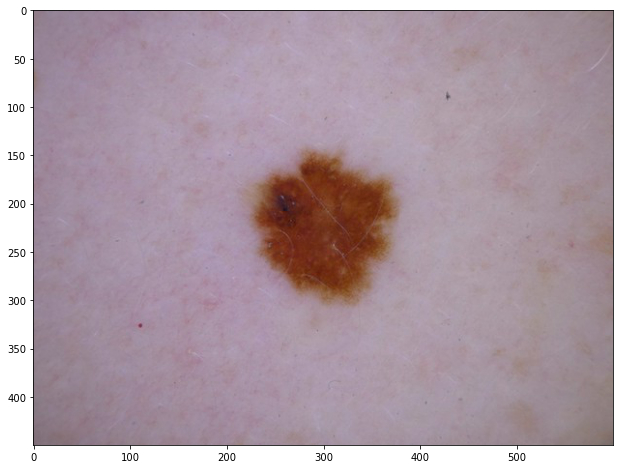

In [25]:
img = imread(os.path.join(data_dir, 'pilot6_1.jpeg'))

if len(img.shape) > 2 and img.shape[2] == 4:
    #convert the image from RGBA2RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
gray_img = rgb2gray(img)
plt.figure()
plt.imshow(img) 
plt.show() 

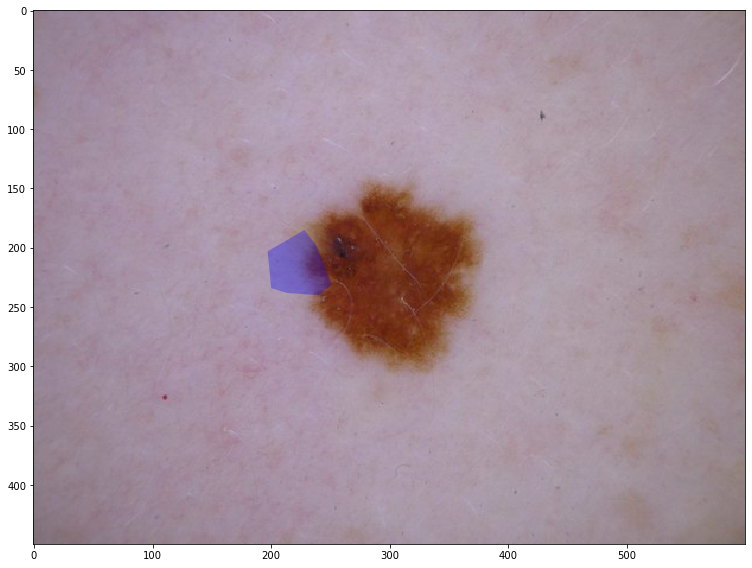

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


p1 = Polygon(poly1.round(), alpha=0.3, facecolor='b')

fig, ax = plt.subplots()
ax.add_patch(p1)
imshow(img)
plt.show()

In [42]:
def poly2mask(vertex_row_coords, vertex_col_coords, shape):
    fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
    mask = np.zeros(shape, dtype=bool)
    mask[fill_row_coords, fill_col_coords] = True
    return mask.astype(int)

mask1 = poly2mask(poly1[:, 1], poly1[:, 0], (450, 600))
mask1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Overlap:  0.6231742940603701


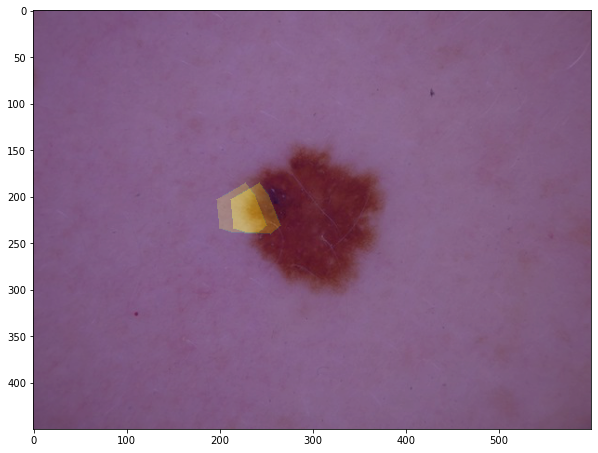

In [28]:
def overlap(a, b, method='dice'):
    a = a.flatten()
    b = b.flatten()
    tn, fp, fn, tp = confusion_matrix(a, b, labels=[0, 1]).ravel()
    if method == 'dice':
        return 2*tp / (2*tp + fp + fn)
    elif method == 'jaccard':
        return tp / (tp + fp + fn)

mask1 = mask1.copy()
mask2 = np.roll(mask1, 15)

plt.figure(figsize = (10, 10))
plt.imshow(img, alpha=1)
plt.imshow(mask1, alpha=0.2)
plt.imshow(mask2, alpha=0.2)


print("Overlap: ", overlap(mask1, mask2, method='dice'))

## Process all annotations and check andere erklärung

In [362]:
import json 
import os
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
from matplotlib.path import Path


import numpy as np
plt.rcParams["figure.figsize"] = (15,8)
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.draw import polygon
from skimage import draw
from sklearn.metrics import confusion_matrix
import cv2


confidence9 = []

for num in ['9']:
    data_dir = "/home/kti01/Documents/My Files/Projects/Overlap/data/pilot/pilot"+num
    annotations_list = []
    for file in os.listdir(data_dir):
        if file.endswith('json'):
            with open(os.path.join(data_dir, file)) as f:
                d = json.load(f)
                annotations_list.append(dict(d))

    for annotations in annotations_list:
        if len(annotations['Melanom']) > 0:
            diag = 'Melanom'
            num_polygons = len(annotations['Melanom'])

        if len(annotations['Nävus (belassen) ']) > 0:
            diag = 'Nävus (belassen) '
            num_polygons = len(annotations['Nävus (belassen) '])

        if len(annotations['Nävus (exzidieren)']) > 0:
            diag = 'Nävus (exzidieren)'
            num_polygons = len(annotations['Nävus (exzidieren)'])

        poly1 = np.array(annotations[diag][0]['data']['points'])
        poly1[:, 0] *= 600
        poly1[:, 1] *= 450
        poly1 = poly1.astype(int)

        other_exp = []
        
        for i in range(num_polygons):
            key = list(annotations[diag][i]['children'].keys())[0]
            exp = annotations[diag][i]['children'][key]['data']
            try:
                conf = int(annotations[diag][i]['children']['Konfidenz in die Entscheidung']['data']['selected'])
                confidence9.append(conf)
            except:
                pass
            if exp != '':
                print(diag)
                print(exp)
                other_exp.append(exp)
                print()
        

Nävus (exzidieren)
V.a. Sonnenbrandlentigo

Melanom
peppering

Melanom
unscharf, schwer zu beurteilen



## Process all annotations and extract ontological features

In [37]:
import json 
import os
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
from matplotlib.path import Path

from collections import Counter
import numpy as np
plt.rcParams["figure.figsize"] = (15,8)
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.draw import polygon
from skimage import draw
from sklearn.metrics import confusion_matrix
import cv2


final_annotations = {}
for num in ['6']:
    data_dir = "/home/kti01/Documents/My Files/Projects/Overlap/data/pilot/pilot"+num
    annotations_dict = {}

    # read files
    for file in os.listdir(data_dir):
        if file.endswith('json'):
            with open(os.path.join(data_dir, file)) as f:
                d = json.load(f)
                annotations_dict[file] = dict(d)
                
    # go through annotations
    for file, annotations in annotations_dict.items():
        if len(annotations['Melanom']) > 0:
            diag = 'Melanom'
            num_polygons = len(annotations['Melanom'])

        if len(annotations['Nävus (belassen) ']) > 0:
            diag = 'Nävus (belassen) '
            num_polygons = len(annotations['Nävus (belassen) '])

        if len(annotations['Nävus (exzidieren)']) > 0:

            diag = 'Nävus (exzidieren)'
            num_polygons = len(annotations['Nävus (exzidieren)'])
        
        
        final_annotations[file.split('.')[0]] = []
        # go through polygons for this annotation
        for i in range(num_polygons):
            poly = np.array(annotations[diag][i]['data']['points'])
            poly[:, 0] *= 600
            poly[:, 1] *= 450
            poly = poly.astype(int)
            exp = annotations[diag][i]['children']['Erklärung']['data']['selected']
            exp = [e.strip() for e in exp]
                
            final_annotations[file.split('.')[0]].append((exp, poly))

In [39]:
annotations

{'Melanom': [{'type': 'polygon',
   'data': {'points': [[0.5150672645739911, 0.8516364919394174],
     [0.7116591928251121, 0.8076818389178559],
     [0.796322869955157, 0.6203967956085942],
     [0.8063677130044844, 0.44075603978134303],
     [0.6901345291479822, 0.2859592182706266],
     [0.5839461883408072, 0.20760527158001701],
     [0.4275336322869955, 0.1770281216519743],
     [0.2883408071748879, 0.28022600265911857],
     [0.24529147982062777, 0.3910681711482735],
     [0.2495964125560538, 0.57453107071653],
     [0.3127354260089686, 0.6872843110761877],
     [0.428968609865471, 0.8267925576228827],
     [0.46340807174887894, 0.8439922044574067],
     [0.5165022421524664, 0.941456869853043],
     [0.6671748878923768, 0.941456869853043],
     [0.761883408071749, 0.8650139950329362],
     [0.8207174887892378, 0.7216836047452357],
     [0.8666367713004485, 0.626130011220102],
     [0.8680717488789239, 0.4732442615798884],
     [0.8479820627802691, 0.3738685243137495],
     [0.7877

In [14]:
import pandas as pd
char_class_labels = ['TRBL', 'ESA', 'BDG', 'GP', 'PV', 'PRL', 'WLSA', 'OPC', 'SPC', 'MVP', 'PRLC', 'APC', 'MS']
df = pd.read_pickle('/home/kti01/Documents/My Files/Projects/Overlap/characteristics_classifier/data/HAM10000/HAM10000/metadata.pkl')
df.MS.value_counts()

1    2430
0    1178
Name: MS, dtype: int64